In [1]:
import os
os.environ["OMP_NUM_THREADS"]='8'
import matplotlib.pyplot as plt
import numpy as np
import timeit
from scipy.linalg import pinv, svd, eig
from scipy.linalg import svdvals

In [2]:
# N=10000
# K=2
# seed=1
# c=1.75
# t1=100
# dt=1E-2
# atol=1E-8
# fs=np.zeros(N+2)
# ns=[0,1,-1]
# omega=np.zeros(N)

# filebase='data/dmd2'
# os.system('mkdir -p %s'%(filebase))
# os.system('rm %s/*'%(filebase))
# for n in np.arange(len(ns)):
#     fs[np.argsort(-omega)]=ns[n]*(2*np.pi*np.arange(N)/N-np.pi)
#     fs[-2]=-1E-14
#     fs[-1]=0.01
#     fs.tofile('%s/%ifs.dat'%(filebase,n))
#     os.system('bash -c "./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -a %e -g 3 -nvR %s/%i"'%(N,K,c,t1,dt,seed,atol,filebase,n))
#     omega=np.fromfile('%s/0frequencies.dat'%(filebase),dtype=np.float64)

# K=N
# filebase='data/dmd3'
# os.system('mkdir -p %s'%(filebase))
# os.system('rm %s/*'%(filebase))
# for n in np.arange(len(ns)):
#     fs[np.argsort(-omega)]=ns[n]*(2*np.pi*np.arange(N)/N-np.pi)
#     fs[-2]=-1E-14
#     fs[-1]=0.01
#     fs.tofile('%s/%ifs.dat'%(filebase,n))
#     os.system('bash -c "./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -a %e -g 3 -nvR %s/%i"'%(N,K,c,t1,dt,seed,atol,filebase,n))
#     omega=np.fromfile('%s/0frequencies.dat'%(filebase),dtype=np.float64)

# K=2
# c=1
# filebase='data/dmd1'
# os.system('mkdir -p %s'%(filebase))
# os.system('rm %s/*'%(filebase))
# for n in np.arange(len(ns)):
#     fs[np.argsort(-omega)]=ns[n]*(2*np.pi*np.arange(N)/N-np.pi)
#     fs[-2]=-1E-14
#     fs[-1]=0.01
#     fs.tofile('%s/%ifs.dat'%(filebase,n))
#     os.system('bash -c "./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -a %e -g 3 -nvR %s/%i"'%(N,K,c,t1,dt,seed,atol,filebase,n))
#     omega=np.fromfile('%s/0frequencies.dat'%(filebase),dtype=np.float64)

# os.system('nohup ./dmd.py --filebase data/dmd1/ &> dmd1.out')
# os.system('nohup ./dmd.py --filebase data/dmd2/ &> dmd2.out')
# os.system('nohup ./dmd.py --filebase data/dmd3/ &> dmd3.out')

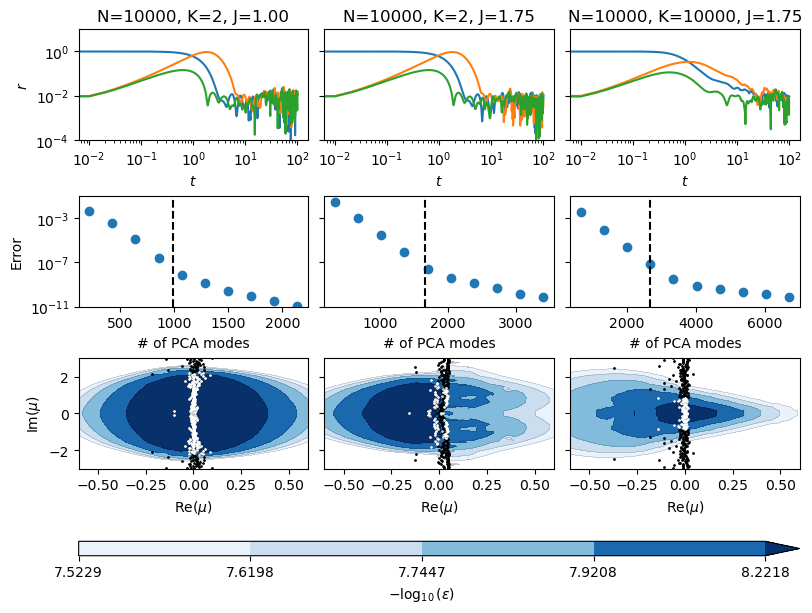

In [3]:
fig,axs=plt.subplots(3,3,figsize=(8,6) ,constrained_layout=True)

plt.subplot(3,3,1)
for n in range(3):
    filebase='data/dmd1/%i'%(n)
    file=open(filebase+'.out')
    lines=file.readlines()
    N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
    N=int(N)
    K=int(K)
    file.close()

    omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float64)
    N=len(omega)
    thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float64).reshape((-1,N))
    thetas=thetas-np.mean(omega)*dt*np.arange(thetas.shape[0])[:,np.newaxis]
    orders=np.fromfile(filebase+'order.dat',dtype=np.float64)
    plt.plot(dt*np.arange(orders.shape[0]),orders)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$t$')
    plt.ylabel('$r$')
    plt.ylim(1E-4,1E1)
    plt.title('N=%i, K=%i, J=%.2f'%(N, K,c))

plt.subplot(3,3,2)
for n in range(3):
    filebase='data/dmd2/%i'%(n)
    file=open(filebase+'.out')
    lines=file.readlines()
    N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
    N=int(N)
    K=int(K)
    file.close()

    omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float64)
    N=len(omega)
    thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float64).reshape((-1,N))
    thetas=thetas-np.mean(omega)*dt*np.arange(thetas.shape[0])[:,np.newaxis]
    orders=np.fromfile(filebase+'order.dat',dtype=np.float64)
    plt.plot(dt*np.arange(orders.shape[0]),orders)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$t$')
    plt.ylim(1E-4,1E1)
    plt.gca().set_yticklabels([])
    plt.title('N=%i, K=%i, J=%.2f'%(N,K,c))
    
plt.subplot(3,3,3)
for n in range(3):
    filebase='data/dmd3/%i'%(n)
    file=open(filebase+'.out')
    lines=file.readlines()
    N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
    N=int(N)
    K=int(K)
    file.close()

    omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float64)
    N=len(omega)
    thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float64).reshape((-1,N))
    thetas=thetas-np.mean(omega)*dt*np.arange(thetas.shape[0])[:,np.newaxis]
    orders=np.fromfile(filebase+'order.dat',dtype=np.float64)
    plt.plot(dt*np.arange(orders.shape[0]),orders)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$t$')
    plt.ylim(1E-4,1E1)
    plt.gca().set_yticklabels([])
    plt.title('N=%i, K=%i, J=%.2f'%(N,K,c))

plt.subplot(3,3,4)
plt.scatter(*np.fromfile('data/dmd1/errs.dat').reshape((2,-1)))
plt.yscale('log')
plt.xlabel('# of PCA modes')
plt.ylabel('Error')
r=np.fromfile('data/dmd1/evals.dat',dtype=np.complex128).shape
plt.ylim(1E-11,1E-1)

plt.plot([r,r],[1E-11,1E-1],c='black',ls='--')

plt.subplot(3,3,5)
plt.scatter(*np.fromfile('data/dmd2/errs.dat').reshape((2,-1)))
plt.yscale('log')
plt.xlabel('# of PCA modes')
plt.ylim(1E-11,1E-1)
plt.gca().set_yticklabels([])

r=np.fromfile('data/dmd2/evals.dat',dtype=np.complex128).shape
plt.plot([r,r],[1E-11,1E-1],c='black',ls='--')

plt.subplot(3,3,6)
plt.scatter(*np.fromfile('data/dmd3/errs.dat').reshape((2,-1)))
plt.yscale('log')
plt.xlabel('# of PCA modes')
plt.ylim(1E-11,1E-1)
plt.gca().set_yticklabels([])

r=np.fromfile('data/dmd3/evals.dat',dtype=np.complex128).shape
plt.plot([r,r],[1E-11,1E-1],c='black',ls='--')


vals1=np.fromfile('data/dmd1/pseudo.dat')
zs1=np.fromfile('data/dmd1/zs.dat',dtype=np.complex128)
vals2=np.fromfile('data/dmd2/pseudo.dat')
zs2=np.fromfile('data/dmd2/zs.dat',dtype=np.complex128)
vals3=np.fromfile('data/dmd3/pseudo.dat')
zs3=np.fromfile('data/dmd3/zs.dat',dtype=np.complex128)
nr=26
ni=26

resmax=1E-8
levels=np.log(np.flip(1/(np.arange(1,6)/5*3*resmax)))/np.log(10)

plt.subplot(3,3,7)
cs1 = plt.gca().tricontourf(np.real(np.log(zs1)/dt),np.imag(np.log(zs1)/dt),np.log(1/np.array(vals1))/np.log(10),levels=levels,cmap='Blues',extend='max')
cs2 = plt.gca().tricontour(cs1,levels=levels,colors=('k',),linewidths=0.1)

xs1=np.real(np.log(zs1[:-nr*ni])/dt)
ys1=np.imag(np.log(zs1[:-nr*ni])/dt)
inds=np.where(vals1[:-nr*ni]<resmax)[0]
plt.scatter(xs1,ys1,c='black',s=1)
plt.scatter(xs1[inds],ys1[inds],c='white',s=1)
plt.ylim(-3,3)
plt.xlim(-0.6,0.6)
plt.ylabel('$\mathrm{Im}({\mu})$')
plt.xlabel('$\mathrm{Re}({\mu})$')


plt.subplot(3,3,8)
cs1 = plt.gca().tricontourf(np.real(np.log(zs2)/dt),np.imag(np.log(zs2)/dt),np.log(1/np.array(vals2))/np.log(10),levels=levels,cmap='Blues',extend='max')
cs2 = plt.gca().tricontour(cs1,levels=levels,colors=('k',),linewidths=0.1)

xs2=np.real(np.log(zs2[:-nr*ni])/dt)
ys2=np.imag(np.log(zs2[:-nr*ni])/dt)
inds=np.where(vals2[:-nr*ni]<resmax)[0]
plt.scatter(xs2,ys2,c='black',s=1)
plt.scatter(xs2[inds],ys2[inds],c='white',s=1)
plt.ylim(-3,3)
plt.xlim(-0.6,0.6)
plt.gca().set_yticklabels([])
plt.xlabel('$\mathrm{Re}({\mu})$')


plt.subplot(3,3,9)
cs1 = plt.gca().tricontourf(np.real(np.log(zs3)/dt),np.imag(np.log(zs3)/dt),np.log(1/np.array(vals3))/np.log(10),levels=levels,cmap='Blues',extend='max')
cs2 = plt.gca().tricontour(cs1,levels=levels,colors=('k',),linewidths=0.1)

xs3=np.real(np.log(zs3[:-nr*ni])/dt)
ys3=np.imag(np.log(zs3[:-nr*ni])/dt)
inds=np.where(vals3[:-nr*ni]<resmax)[0]
plt.scatter(xs3,ys3,c='black',s=1)
plt.scatter(xs3[inds],ys3[inds],c='white',s=1)
plt.ylim(-3,3)
plt.xlim(-0.6,0.6)
plt.gca().set_yticklabels([])
plt.xlabel('$\mathrm{Re}({\mu})$')

fig.colorbar(cs1, ax=axs[:3,:3], location='bottom',aspect=50,label=r'$-\log_{10}(\varepsilon)$')

plt.savefig('dmd.pdf')
plt.show()